In [6]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


#! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [7]:
CLIENT_ID = 'XXM0AT3HDN4QOFKNAOFP1UOIC0ALE1DAU4YVYBANGELHJO1B' # your Foursquare ID
CLIENT_SECRET = 'D55HUK2B1UQZJILUDL3GPJMRILV5X4PBO0XM2RELROU5HASZ' # your Foursquare Secret
#CODE='EZD1L1PBE0GYPGK3L1H4CD2B0MAYKY3AZOQPWIDLTWA5F2L0#_=_'
ACCESS_TOKEN = 'QTA0BQWBKK4CLAUTECK1PI3IEPF1AYGITM5LDWS0G0MCCHMQ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXM0AT3HDN4QOFKNAOFP1UOIC0ALE1DAU4YVYBANGELHJO1B
CLIENT_SECRET:D55HUK2B1UQZJILUDL3GPJMRILV5X4PBO0XM2RELROU5HASZ


In [24]:


business = pd.read_csv('https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD')
print(business.shape)
business.head()

(265717, 31)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,1195825-07-181,1090539,"Avatar Foods International, Inc",War Memorial Opera House,301 Van Ness Ave,San Francisco,CA,94102.0,07/23/2018,07/23/2018,...,NaN,5.0,Hayes Valley,NaN,POINT (-122.41999 37.77829),21.0,21.0,4.0,11.0,9.0
1,1218943-04-191,1090062,"Mag Physical Therapy, Pilates & Wellness, Inc.","Mag Pt, Pilates & Wellness",2065 Vallejo St Apt 3,San Francisco,CA,94123.0,03/16/2018,NaN,...,NaN,2.0,Pacific Heights,NaN,POINT (-122.43122 37.795696),102.0,102.0,4.0,6.0,30.0
2,1213384-02-191,1098373,Shivaya Tcsf Llc,The Center Sf Co-Work And Event Space,546 Fillmore St,San Francisco,CA,94117.0,02/01/2019,NaN,...,NaN,5.0,Hayes Valley,NaN,POINT (-122.43088 37.774418),26.0,26.0,4.0,11.0,9.0
3,1204238-10-181,1094420,Edy O Gonzales,Eg Construction,120 Angelita Ave,Pacifica,CA,94044.0,05/01/2018,NaN,...,NaN,NaN,NaN,NaN,POINT (-122.477066 37.613758),NaN,NaN,NaN,NaN,NaN
4,1199922-09-181,1092390,Tyree Vaughn,Big Ree Kitchen.,1565 Sunnydale Ave Ave,San+francisco,CA,94134.0,09/06/2018,NaN,...,NaN,10.0,Visitacion Valley,NaN,POINT (-122.4172 37.71216),74.0,74.0,9.0,9.0,40.0


In [26]:
business2 = business[['Business Start Date','DBA Name', 'Neighborhoods - Analysis Boundaries']].copy()

#drop null values
business3 = business2.dropna()

#convert business start date to datetime
business3['Business Start Date'] = business3['Business Start Date'].astype('datetime64[ns]') 

#let's just look at areas that have seen the most businesses start in the last decade.
business4 = business3.loc[business3['Business Start Date'] > '2010-01-01']

#let's also rename 'Neighborhoods - Analysis Boundaries' to just be 'Neighborhoods'
business4.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace = True)

#let's do the same thing for the business name
business4.rename(columns={'DBA Name': 'Business Name'}, inplace = True)

business4.head()

,Business Start Date,Business Name,Neighborhood
0,2018-07-23,War Memorial Opera House,Hayes Valley
1,2018-03-16,"Mag Pt, Pilates & Wellness",Pacific Heights
2,2019-02-01,The Center Sf Co-Work And Event Space,Hayes Valley
4,2018-09-06,Big Ree Kitchen.,Visitacion Valley
5,2018-08-20,Daniel Plautz,Castro/Upper Market


In [27]:

#Count the number of businesses in each neighborhood by grouping the data
business5 = business4.groupby('Neighborhood', as_index=False).count()
business5.reset_index()
#let's get rid of the business start date, we won't be needing it anymore
business5.drop(columns = 'Business Start Date',inplace = True)
#rename our "business name" column to "Businesses" to reflect the count per neighborhood
business5.rename(columns={'Business Name': 'Businesses'}, inplace = True)
#and sort the data
business6 = business5.sort_values(by= ['Businesses'], ascending = False).head(10)
business6.reset_index(drop=True)
business6

,Neighborhood,Businesses
5,Financial District/South Beach,19670
18,Mission,10336
33,South of Market,8782
34,Sunset/Parkside,6020
0,Bayview Hunters Point,5747
16,Marina,4336
35,Tenderloin,4079
25,Outer Richmond,4064
2,Castro/Upper Market,3938
3,Chinatown,3887


In [28]:
#for reference, here is every neighborhood in SF as well as the count of registered businesses
business7 = business5.sort_values(by= ['Businesses'], ascending = False)
business7.reset_index(drop=True)
print(business7.shape)
business7

(41, 2)


,Neighborhood,Businesses
5,Financial District/South Beach,19670
18,Mission,10336
33,South of Market,8782
34,Sunset/Parkside,6020
0,Bayview Hunters Point,5747
16,Marina,4336
35,Tenderloin,4079
25,Outer Richmond,4064
2,Castro/Upper Market,3938
3,Chinatown,3887


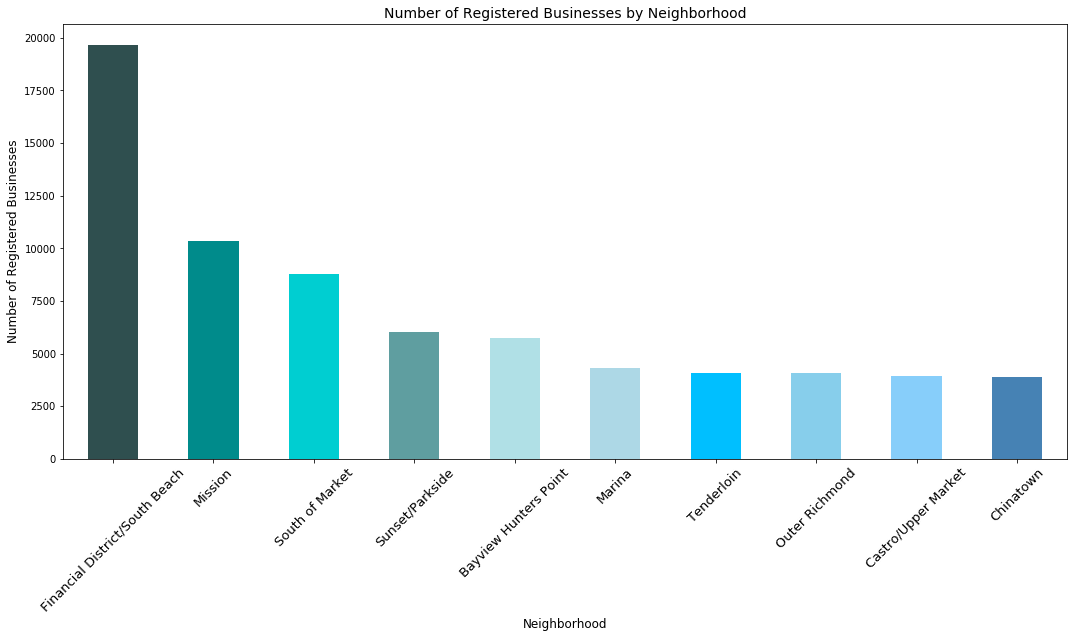

In [30]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


business6.plot.bar(x = 'Neighborhood', y = 'Businesses', title = "Number of Registered Businesses by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Businesses', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Registered Businesses by Neighborhood', fontsize = 14)
plt.show()

In [67]:
SF_Neighborhoods = business6

In [68]:

from geopy.geocoders import Nominatim

In [69]:
def get_latitude_longitude(x):
    if x:
        return x.latitude, x.longitude
    else:
        return None

In [70]:

from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="SF_explorer")
SF_Neighborhoods['Coordinates'] = SF_Neighborhoods['Neighborhood'].apply(geolocator.geocode).apply(get_latitude_longitude)
SF_Neighborhoods

,Neighborhood,Businesses,Coordinates
5,Financial District/South Beach,19670,None
18,Mission,10336,"(26.2159066, -98.3252932)"
33,South of Market,8782,"(37.7808925, -122.4009518)"
34,Sunset/Parkside,6020,"(42.75562315, -81.19147418031011)"
0,Bayview Hunters Point,5747,"(46.823038, -92.0821832)"
16,Marina,4336,"(43.5139149, 16.1092196)"
35,Tenderloin,4079,"(37.7842493, -122.4139933)"
25,Outer Richmond,4064,"(44.108805, -69.798725)"
2,Castro/Upper Market,3938,"(37.767115, -122.4288861)"
3,Chinatown,3887,"(40.7164913, -73.9962504)"


In [82]:
SF_Neighborhoods = SF_Neighborhoods.dropna(subset=['Coordinates'])

In [83]:
SF_Neighborhoods

,Neighborhood,Businesses,Coordinates
18,Mission,10336,"(26.2159066, -98.3252932)"
33,South of Market,8782,"(37.7808925, -122.4009518)"
34,Sunset/Parkside,6020,"(42.75562315, -81.19147418031011)"
0,Bayview Hunters Point,5747,"(46.823038, -92.0821832)"
16,Marina,4336,"(43.5139149, 16.1092196)"
35,Tenderloin,4079,"(37.7842493, -122.4139933)"
25,Outer Richmond,4064,"(44.108805, -69.798725)"
2,Castro/Upper Market,3938,"(37.767115, -122.4288861)"
3,Chinatown,3887,"(40.7164913, -73.9962504)"


In [102]:
SF_Neighborhoods['Coordinates'] = SF_Neighborhoods['Coordinates'].astype(str)

In [104]:
SF_Neighborhoods[['Latitude','Longitude']] = SF_Neighborhoods['Coordinates'].str.strip('(').str.strip(')').str.split(', ', expand=True)

In [105]:
SF_Neighborhoods

,Neighborhood,Businesses,Coordinates,Latitude,Longitude
18,Mission,10336,"(26.2159066, -98.3252932)",26.2159066,-98.3252932
33,South of Market,8782,"(37.7808925, -122.4009518)",37.7808925,-122.4009518
34,Sunset/Parkside,6020,"(42.75562315, -81.19147418031011)",42.75562315,-81.19147418031011
0,Bayview Hunters Point,5747,"(46.823038, -92.0821832)",46.823038,-92.0821832
16,Marina,4336,"(43.5139149, 16.1092196)",43.5139149,16.1092196
35,Tenderloin,4079,"(37.7842493, -122.4139933)",37.7842493,-122.4139933
25,Outer Richmond,4064,"(44.108805, -69.798725)",44.108805,-69.798725
2,Castro/Upper Market,3938,"(37.767115, -122.4288861)",37.767115,-122.4288861
3,Chinatown,3887,"(40.7164913, -73.9962504)",40.7164913,-73.9962504


In [106]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [107]:
SF_venues = getNearbyVenues(names=SF_Neighborhoods['Neighborhood'],
                                   latitudes=SF_Neighborhoods['Latitude'],
                                   longitudes=SF_Neighborhoods['Longitude']
                                  )

Mission
South of Market
Sunset/Parkside
Bayview Hunters Point
Marina
Tenderloin
Outer Richmond
Castro/Upper Market
Chinatown


In [108]:
SF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview Hunters Point,17,17,17,17,17,17
Castro/Upper Market,30,30,30,30,30,30
Chinatown,30,30,30,30,30,30
Marina,8,8,8,8,8,8
Mission,14,14,14,14,14,14
South of Market,30,30,30,30,30,30
Sunset/Parkside,5,5,5,5,5,5
Tenderloin,30,30,30,30,30,30


In [109]:

print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 90 uniques categories.


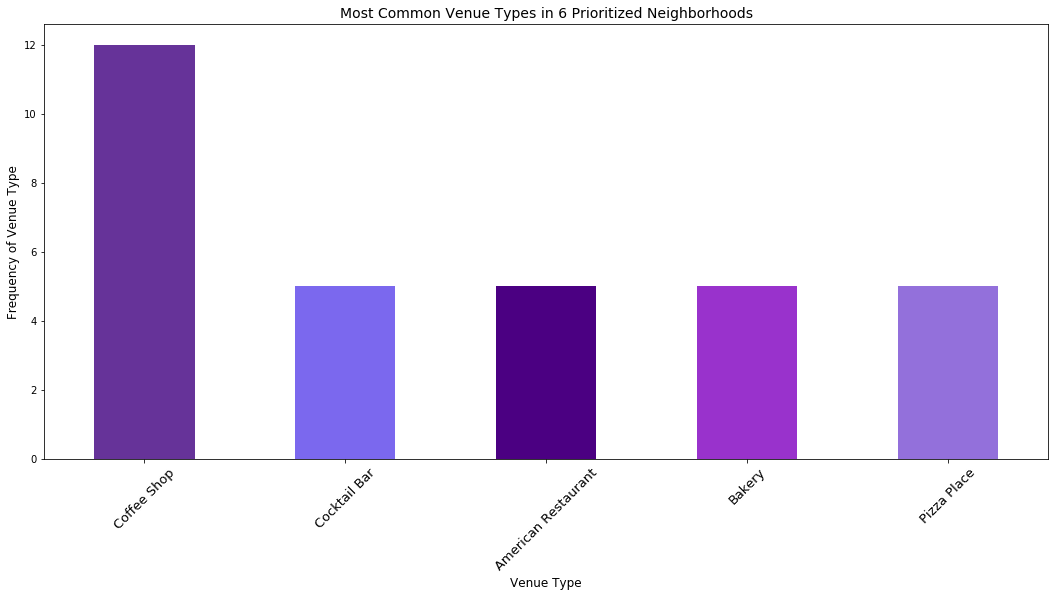

In [110]:
SF_top_venues = SF_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(5)
SF_top_venues = SF_top_venues[['Venue Category','Neighborhood']]
SF_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
SF_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 6 prioritized neighborhoods", rot= 45, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 6 Prioritized Neighborhoods', fontsize = 14)
plt.show()

In [111]:
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Art Museum,Asian Restaurant,Bakery,Baseball Field,Beach,Beer Bar,...,Tanning Salon,Tea Room,Thai Restaurant,Theater,Tiki Bar,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Mission,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mission,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mission,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mission,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mission,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:

SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
print(SF_grouped.shape)
SF_grouped

(8, 91)


,Neighborhood,ATM,Accessories Store,American Restaurant,Art Museum,Asian Restaurant,Bakery,Baseball Field,Beach,Beer Bar,...,Tanning Salon,Tea Room,Thai Restaurant,Theater,Tiki Bar,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Bayview Hunters Point,0.058824,0.000000,0.117647,0.000000,0.000000,0.000000,0.0,0.000,0.000000,...,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000
1,Castro/Upper Market,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.0,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333
2,Chinatown,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.0,0.000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000
3,Marina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.125,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Mission,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,South of Market,0.000000,0.033333,0.033333,0.033333,0.000000,0.033333,0.0,0.000,0.000000,...,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000
6,Sunset/Parkside,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Tenderloin,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.0,0.000,0.033333,...,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000


In [113]:
#print each neighborhood with the top 5 most common venues
num_top_venues = 5

for hood in SF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayview Hunters Point----
                 venue  freq
0  American Restaurant  0.12
1          Pizza Place  0.12
2          Coffee Shop  0.12
3                  ATM  0.06
4        Tanning Salon  0.06


----Castro/Upper Market----
              venue  freq
0  Sushi Restaurant  0.07
1               Gym  0.07
2           Gay Bar  0.07
3       Yoga Studio  0.03
4       Pizza Place  0.03


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.13
1        Optical Shop  0.10
2      Ice Cream Shop  0.07
3  Salon / Barbershop  0.07
4              Bakery  0.07


----Marina----
                         venue  freq
0  Eastern European Restaurant  0.12
1                        Hotel  0.12
2                         Food  0.12
3              Harbor / Marina  0.12
4                        Beach  0.12


----Mission----
                 venue  freq
0  American Restaurant  0.14
1    Convenience Store  0.14
2       History Museum  0.07
3        Grocery Store  0.07
4         Liquor Sto

In [114]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [115]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(SF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,Bayview Hunters Point,Coffee Shop,American Restaurant,Pizza Place,Supermarket,Frozen Yogurt Shop,Liquor Store,Mexican Restaurant,Electronics Store,Museum,...,Flower Shop,Food,Food Truck,Dessert Shop,Football Stadium,Fountain,French Restaurant,Accessories Store,Garden,Gas Station
1,Castro/Upper Market,Sushi Restaurant,Gay Bar,Gym,Yoga Studio,Poke Place,Pizza Place,Pet Store,Coffee Shop,Concert Hall,...,Seafood Restaurant,Sandwich Place,Bakery,Tiki Bar,Beer Garden,Wine Bar,Scandinavian Restaurant,Football Stadium,Accessories Store,American Restaurant
2,Chinatown,Chinese Restaurant,Optical Shop,Dessert Shop,Ice Cream Shop,Bakery,Salon / Barbershop,Spa,Cocktail Bar,Snack Place,...,Food Truck,Eastern European Restaurant,Design Studio,Dive Shop,Frozen Yogurt Shop,French Restaurant,Electronics Store,Dance Studio,Filipino Restaurant,Flower Shop
3,Marina,Hotel,Eastern European Restaurant,Harbor / Marina,Coffee Shop,Beach,Cocktail Bar,Boat or Ferry,Food,Yoga Studio,...,Gay Bar,Gourmet Shop,Grocery Store,Gym,Dive Shop,Cosmetics Shop,Design Studio,Beer Garden,Accessories Store,American Restaurant
4,Mission,American Restaurant,Convenience Store,Grocery Store,Football Stadium,Electronics Store,Park,Coffee Shop,Clothing Store,Movie Theater,...,Gas Station,Filipino Restaurant,Gay Bar,Gourmet Shop,Eastern European Restaurant,Yoga Studio,Dessert Shop,Boat or Ferry,Accessories Store,Art Museum
5,South of Market,Café,Gym / Fitness Center,Pizza Place,Coffee Shop,New American Restaurant,Art Museum,Grocery Store,Dive Shop,Museum,...,Wine Shop,French Restaurant,American Restaurant,Tea Room,Bakery,Football Stadium,Eastern European Restaurant,Food,Flower Shop,Filipino Restaurant
6,Sunset/Parkside,Playground,Park,Gas Station,Baseball Field,Flower Shop,Food Truck,Dessert Shop,Dive Shop,Eastern European Restaurant,...,Grocery Store,Gym,Fountain,Dance Studio,Harbor / Marina,Cosmetics Shop,Accessories Store,American Restaurant,Art Museum,Asian Restaurant
7,Tenderloin,Coffee Shop,Wine Bar,Cocktail Bar,Burger Joint,Sandwich Place,Speakeasy,Hawaiian Restaurant,Beer Bar,Filipino Restaurant,...,Spa,Electronics Store,Dessert Shop,Dive Shop,Eastern European Restaurant,Gas Station,Football Stadium,Garden,Frozen Yogurt Shop,French Restaurant


In [122]:

from sklearn.cluster import KMeans

kclusters = 3

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 2, 0, 0, 1, 0])